# Week 3 Assignment: Approximating the Data Points through a Curve

In [1]:
# You may need this setup
using Plots
gr() # Activate the GR backend for use with Plots

Plots.GRBackend()

Import the supplied data representing 15 pairs to x- and y-values. 

In [2]:
data_tofit = [1.6800483    -1.641695388; 
              0.501309281  -0.977697538; 
              1.528012113   0.52771122;
              1.70012253    1.711524991; 
              1.992493625   1.891000015;
              2.706075824  -0.463427794;
              2.994931927  -0.443566619;
              3.491852811  -1.275179133;
              3.501191722  -0.690499597;
              4.459924502  -5.516130799;
              4.936965851  -6.001703074;
              5.023289852  -8.36416901;
              5.04233698   -7.924477517;
              5.50739285  -10.77482371;
              5.568665171 -10.9171878]

# Create the arrays x and y, assigning x the first column of data_tofit and y the second column

x = data_tofit[:, 1]
y = data_tofit[:, 2]

15-element Array{Float64,1}:
  -1.641695388
  -0.977697538
   0.52771122 
   1.711524991
   1.891000015
  -0.463427794
  -0.443566619
  -1.275179133
  -0.690499597
  -5.516130799
  -6.001703074
  -8.36416901 
  -7.924477517
 -10.77482371 
 -10.9171878  

Then we do a scatterplot, this gives us the points the line must go through.

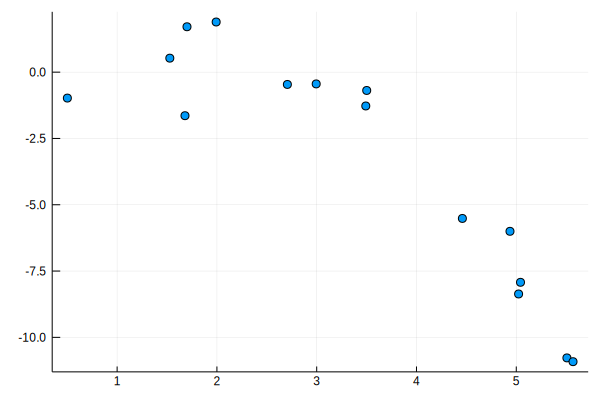

In [3]:
# Plot the x and y data points using a scatter plot of the x and y array variables

scatter(x, y, legend=false)

For the line, we need a function, which we now define. Note that the parameters a, b, c need not be passed to the function: we will keep resetting them to try to improve the fit.

In [4]:
# Create a function called parafit, with x as the argument, returning a*x^2 + b*x + c

parafit(x) = a*x^2 + b*x + c

parafit(x::Array{Float64,1}) = a*(x.^2) + b*x .+ c

parafit (generic function with 2 methods)

Let's check that we do get a reasonable parabola. Choose your own interval [xmin, xmax] and parameters a, b, c. If it looks too much like a straight line, chance your choices until it does.

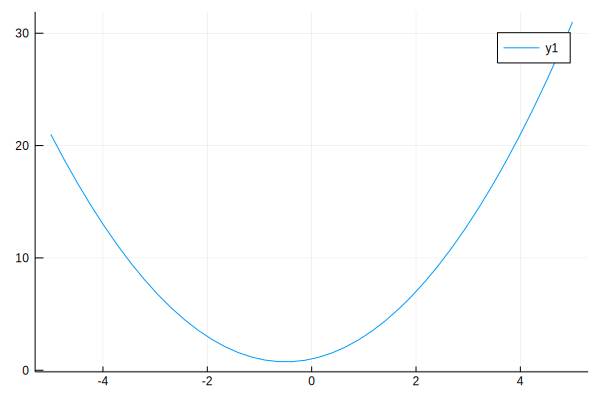

In [5]:
# Create variables a, b and c, assigning each the value 1
a = 1
b = 1
c = 1

# Plot the function parabfit, for x values between -5 and 5 

plot(parafit, range(-5, stop = 5, length = 40))

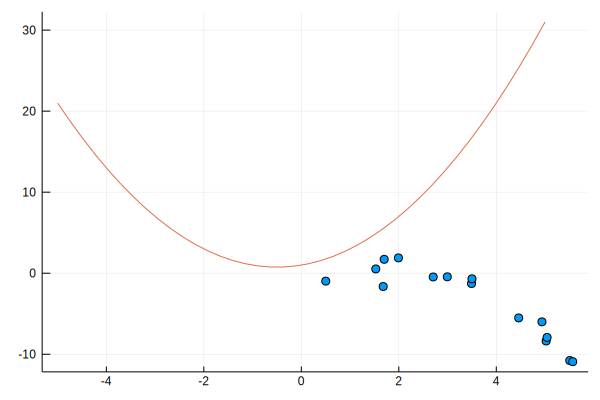

In [6]:
scatter(x, y, legend=false)
plot!(parafit, range(-5, stop=5, length=40))

Now we choose a, b, c and plot the curve together with the points. 

Note that by looking at where the data points lie, we can deduce some of the properties for a, b, c, as follows.

The plot must have a y-intersection that is close to 0, so c is close to 0. Also, the parabola is open downwards, so a must be negative. Finally, it has its maximum at a positive x, so b must be positive. 

Use plot() to start with the scatter plot and plot!() to add the curve for parabfit. (There are other ways to do this ...)

In [7]:
n = size(y)[1]

# Utility to find the residue of the model.

residue(x::Array{Float64,1}, y::Array{Float64,1}) = parafit(x) .- y

residue (generic function with 1 method)

# Model fitting using Manual Parameter Adjustment

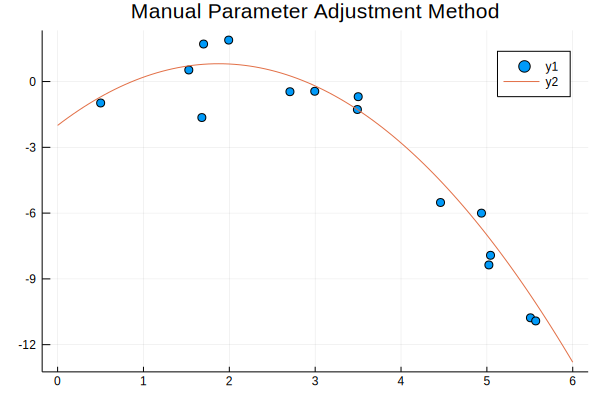

In [8]:
# More plot!() tries.
a,b,c = -0.8, 3, -2

scatter(x, y)
plot!(parafit, range(0, stop=6, length=100), title="Manual Parameter Adjustment Method")

In [9]:
# This is the standard error of the model.

sqrt(sum(residue(x,y) .^ 2) / (n - (2+1)))

1.088578364639973

# Model Fitting using Cubic Regression 
<br><br>
First define the least square loss for the model.<br>

$${\large{S_{r}}} = \sum{e^2} = \sum_{i=1}^{n}(y_{i} - (ax_{i}^{2} + bx_{i} + c))^{2} $$<br>
$${\large{S_{r}}} = \sum_{i=1}^{n}((ax_{i}^{2} + bx_{i} + c) - y_{i})^{2} $$<br>

Partially diffrentiate with respect to the parametrs of the model and equate to zero.<br>

$${\large{\frac{\partial S_{r}}{\partial S_{a}}}} = 2\sum_{i=1}^{n}((ax_{i}^{2} + bx_{i} + c - y_{i}).x_{i}^{2}) = 0 $$<br>
$${\large{\frac{\partial S_{r}}{\partial S_{b}}}} = 2\sum_{i=1}^{n}((ax_{i}^{2} + bx_{i} + c - y_{i}).x_{i}) = 0 $$<br>
$${\large{\frac{\partial S_{r}}{\partial S_{c}}}} = 2\sum_{i=1}^{n}(ax_{i}^{2} + bx_{i} + c - y_{i}) = 0$$<br>

Rewrite the equations.<br>

$$ a\sum_{i=1}^{n}x_{i}^{4} + b\sum_{i=1}^{n}x_{i}^{3} + c\sum_{i=1}^{n}x_{i}^{2} = \sum_{i=1}^{n}x_{i}^{2}y_{i} $$<br>
$$ a\sum_{i=1}^{n}x_{i}^{3} + b\sum_{i=1}^{n}x_{i}^{2} + c\sum_{i=1}^{n}x_{i} = \sum_{i=1}^{n}x_{i}y_{i} $$<br>
$$ a\sum_{i=1}^{n}x_{i}^{2} + b\sum_{i=1}^{n}x_{i} + c.n = \sum_{i=1}^{n}y_{i} $$<br>

Now, we can estimate the values of the sum using the given data and represent equations in matrix format.<br>

$$ A^{T}X = B$$

where A in column vector of parameters a, b and c respectively; X is matrix of coefficents and B is the Column Vector of RHS of equations.<br>

$$ A = X^{-1}B $$

Standard error of the estimate is <br>
$$ S_{y/x} = \sqrt{\frac{S_{r}}{n-(m+1)}}, $$

where "n" is total no of data points and "m" is the order of the polynomial.

In [10]:
# Coefficient of X matrix

x4_sum = sum(x.^4)
x3_sum = sum(x.^3)
x2_sum = sum(x.^2)
x_sum = sum(x)

X_matrix = [x4_sum x3_sum x2_sum; x3_sum x2_sum x_sum; x2_sum x_sum n]


# Coefficient of B Vector

x2y_sum = sum((x.^2).*y)
xy_sum = sum(x.*y)
y_sum = sum(y)

B = [x2y_sum, xy_sum, y_sum]


# the Value of A vector is.

A = inv(X_matrix) * B

3-element Array{Float64,1}:
 -0.8954949323743833
  3.510725129758839 
 -2.7478361309107697

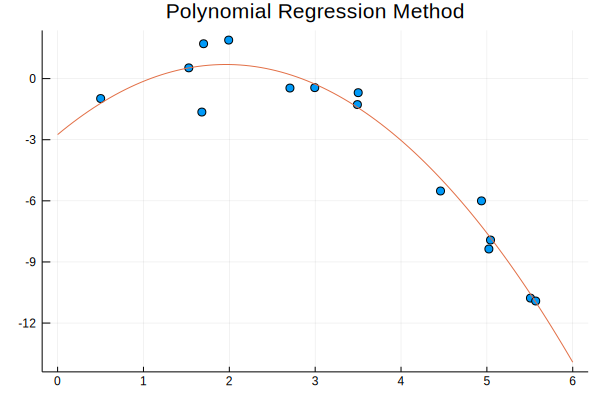

In [11]:
a,b,c = A[1], A[2], A[3]

scatter(x, y)
plot!(parafit, range(0, stop=6, length=100), legend = false, title="Polynomial Regression Method")

In [12]:
# This is the standard error of the model.

sqrt(sum(residue(x,y) .^ 2) / (n - (2+1)))

0.9668841214326902

# Model Fitting Using BackPropagation

In [13]:
function update_params(x::Array{Float64,1}, y::Array{Float64,1}, eta::Float64)
    delS_dela = -2 * eta * sum(residue(x, y) .* (x.^2)) 
    delS_delb = -2 * eta * sum(residue(x, y) .* x)
    delS_delc = -2 * eta * sum(residue(x, y))
    
    return [delS_dela delS_delb delS_delc]
end

update_params (generic function with 1 method)

In [14]:
epochs = 1000

loss_arr = Array{Float64}(undef, epochs)

a, b, c = rand(3) # randomly initialize parametrs of model

for i = 1:epochs
        a, b, c = [a  b  c] + update_params(x, y, 0.0001)
        loss_arr[i] = sum(residue(x, y) .^ 2)
end

In [15]:
a, b, c

(-0.5459815479968637, 1.0617932705856683, 0.7299589438674002)

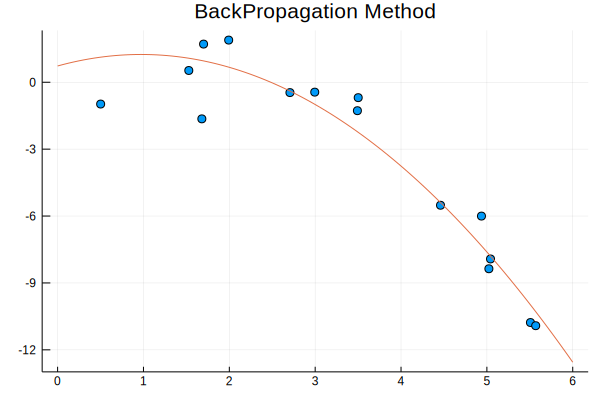

In [16]:
scatter(x, y)
plot!(parafit, range(0, stop=6, length=100), legend = false, title="BackPropagation Method")

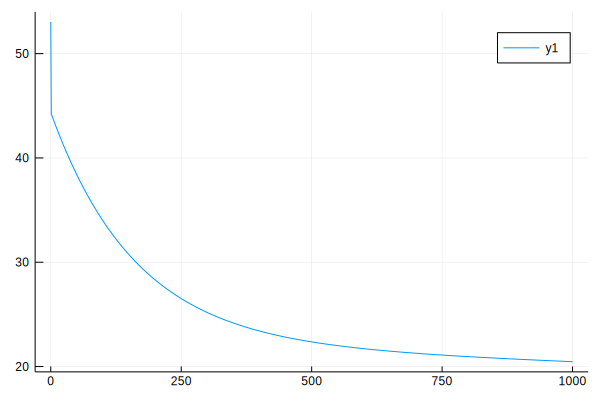

In [17]:
# This shows how loss was decresed on each parameter update.

plot(range(0, stop=epochs, length=epochs), loss_arr)

In [18]:
# This is the final standard error of the model.

sqrt(loss_arr[epochs]/(n-(2+1)))

1.3059565064747178